In [108]:
import yfinance as yf
import bcb

import pandas as pd
import numpy as np 
from  matplotlib import pyplot as plt 
from matplotlib import dates as mdates
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

### Grasping Nubank

In [109]:
nubank = yf.Ticker("NU")

nu_df = pd.DataFrame.from_dict(nubank.info).rename(columns=str.lower).head(1)
nu_df

,address1,city,state,zip,country,website,industry,industrydisp,sector,longbusinesssummary,...,returnonassets,returnonequity,grossprofits,operatingcashflow,revenuegrowth,grossmargins,ebitdamargins,operatingmargins,financialcurrency,trailingpegratio
0,"Rua Capote Valente, 39",São Paulo,SP,5409-0000,Brazil,https://www.nubank.com.br,Banks—Diversified,Banks—Diversified,Financial Services,Nu Holdings Ltd. provides digital banking plat...,...,-0.00662,-0.03558,1839417000,771563008,1.142,1.0,0.0,0.16164,USD,None


In [110]:
nu_metrics = nu_df[['industry', 'sector', 'returnonequity', 'grossprofits', 'operatingcashflow', 
                        'revenuegrowth', 'grossmargins', 
                        'ebitdamargins', 'operatingmargins']].rename(columns={
                                                                        'returnonequity': 'ROE',
                                                                        'grossprofits': 'Gross Profits',
                                                                        'operatingcashflow': 'Operating Cash Flow',
                                                                        'revenuegrowth': 'Revenue Growth',
                                                                        'grossmargins': 'Gross Margins',
                                                                        'ebitdamargins': 'EBTIDA Margins',
                                                                        'operatingmargins': 'Operating Margins'
                                                                                })

nu_metrics

,industry,sector,ROE,Gross Profits,Operating Cash Flow,Revenue Growth,Gross Margins,EBTIDA Margins,Operating Margins
0,Banks—Diversified,Financial Services,-0.03558,1839417000,771563008,1.142,1.0,0.0,0.16164


### Nubank's stock performance

In [111]:
nu = yf.download("NU",
                start= dt.datetime.now() - dt.timedelta(365*5),
                interval='1wk',
                end= dt.datetime.now(),
                prepost=False,
                repair=True).reset_index().rename(columns=str.lower)

nu.head()

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,adj close,volume,repaired?
0,2021-12-06,11.25,12.24,9.80,11.85,11.85,140238100,False
1,2021-12-13,11.10,11.29,9.14,9.80,9.80,90592500,False
2,2021-12-20,9.20,10.00,8.75,9.83,9.83,37064600,False
3,2021-12-27,9.79,9.89,9.25,9.38,9.38,11678700,False
4,2022-01-03,9.60,10.22,8.46,9.36,9.36,45020200,False


In [112]:
nu.describe()

,open,high,low,close,adj close,volume
count,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01
mean,5.594125,6.085663,5.164838,5.589125,5.589125,1.163638e+08
std,1.899244,2.107793,1.672916,1.850599,1.850599,7.001581e+07
min,3.480000,3.650000,3.260000,3.470000,3.470000,1.167870e+07
25%,4.240000,4.658750,3.888750,4.302500,4.302500,8.138975e+07
50%,4.785000,5.110000,4.480000,4.790000,4.790000,1.062556e+08
75%,6.860000,7.577500,6.532500,6.835000,6.835000,1.355408e+08
max,11.250000,12.240000,9.800000,11.850000,11.850000,4.304579e+08


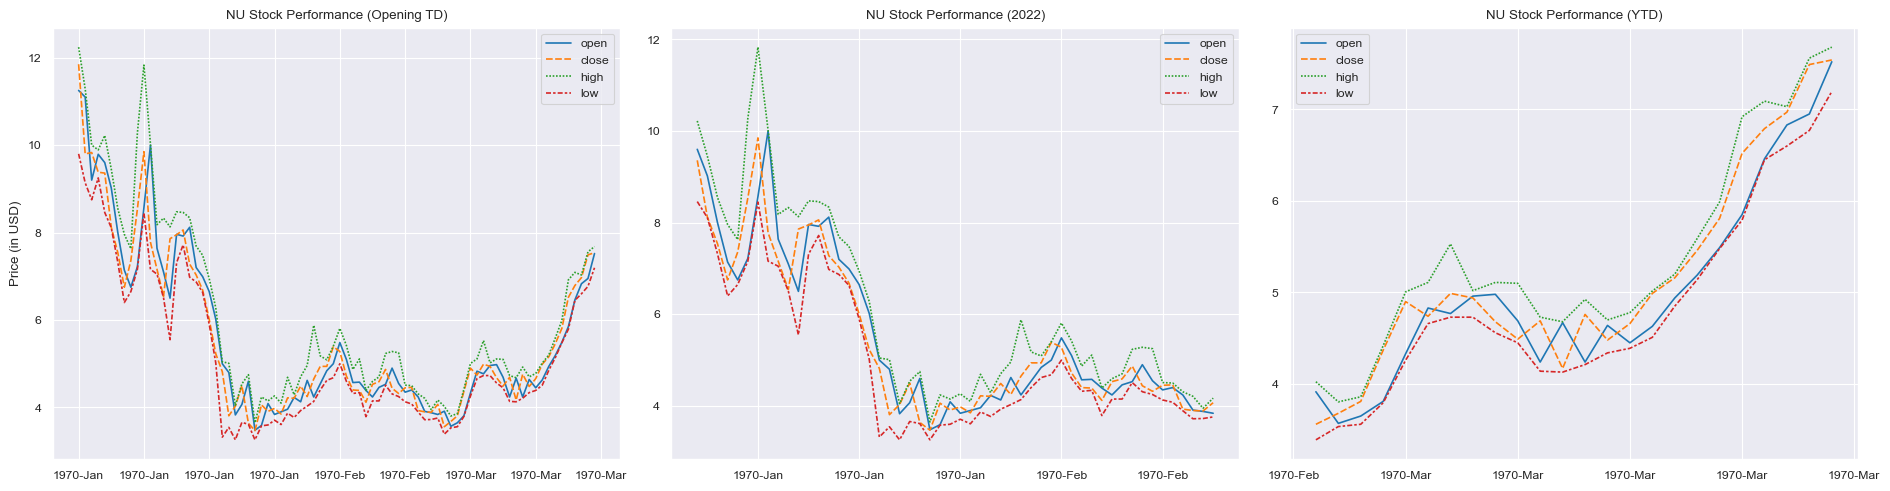

In [121]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(19, 5))
sns.set_style('darkgrid')
sns.set_context('paper')

# AX0
range_1_data = nu[["open", "close", "high", "low"]]
sns.lineplot(data=range_1_data, ax=ax0)

ax0.set(title='NU Stock Performance (Opening TD)',
        ylabel='Price (in USD)')

ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# AX1
time_slicing_1 = nu.query("date >= '2022-01-01' and date < '2023-01-01'")
range_2_data = time_slicing_1[["open", "close", "high", "low"]]
sns.lineplot(data=range_2_data, ax=ax1)

ax1.set(title='NU Stock Performance (2022)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# AX2
time_slicing_2 = nu.query("date >= '2023-01-01'")
range_3_data = time_slicing_2[["open", "close", "high", "low"]]
sns.lineplot(data=range_3_data, ax=ax2)

ax2.set(title='NU Stock Performance (YTD)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.tight_layout()
plt.show()

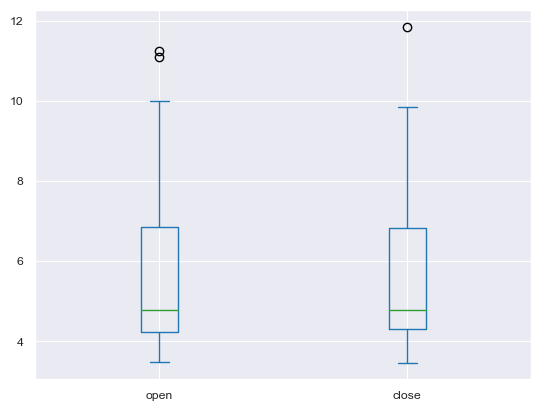

In [114]:
nu[['open', 'close']].plot.box()
plt.show()